# Capstone Project 1: MuscleHub AB Test

## Step 1: Get started with SQL

Like most businesses, Janet keeps her data in a SQL database.  Normally, you'd download the data from her database to a csv file, and then load it into a Jupyter Notebook using Pandas.

For this project, you'll have to access SQL in a slightly different way.  You'll be using a special Codecademy library that lets you type SQL queries directly into this Jupyter notebook.  You'll have pass each SQL query as an argument to a function called `sql_query`.  Each query will return a Pandas DataFrame.  Here's an example:

In [337]:
# This import only needs to happen once, at the beginning of the notebook
from codecademySQL import sql_query

In [338]:
# Here's an example of a query that just displays some data
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [339]:
# Here's an example where we save the data to a DataFrame
df = sql_query('''
SELECT *
FROM applications
LIMIT 7
''')

print df.head()

   index first_name last_name                    email  gender  \
0      0        Roy    Abbott    RoyAbbott32@gmail.com    male   
1      1      Agnes   Acevedo  AgnesAcevedo1@gmail.com  female   
2      2    Roberta   Acevedo         RA8063@gmail.com  female   
3      3     Darren    Acosta  DAcosta1996@hotmail.com    male   
4      4     Vernon    Acosta    VAcosta1975@gmail.com    male   

  application_date  
0       2017-08-12  
1       2017-09-29  
2       2017-09-15  
3       2017-07-26  
4       2017-07-14  


## Step 2: Get your dataset

Let's get started!

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful to you in this investigation:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

Use the space below to examine each table.

In [340]:
# Examine visits here
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [341]:
# Examine fitness_tests here
sql_query('''
SELECT *
FROM fitness_tests
LIMIT 5
''')

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [342]:
# Examine applications here
sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [343]:
# Examine purchases here
sql_query('''
SELECT *
FROM purchases
LIMIT 5
''')

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


We'd like to download a giant DataFrame containing all of this data.  You'll need to write a query that does the following things:

1. Not all visits in  `visits` occurred during the A/B test.  You'll only want to pull data where `visit_date` is on or after `7-1-17`.

2. You'll want to perform a series of `LEFT JOIN` commands to combine the four tables that we care about.  You'll need to perform the joins on `first_name`, `last_name`, and `email`.  Pull the following columns:


- `visits.first_name`
- `visits.last_name`
- `visits.gender`
- `visits.email`
- `visits.visit_date`
- `fitness_tests.fitness_test_date`
- `applications.application_date`
- `purchases.purchase_date`

Save the result of this query to a variable called `df`.

Hint: your result should have 5004 rows.  Does it?

In [344]:
df = sql_query('''SELECT visits.first_name, visits.last_name, visits.gender, visits.email, visits.visit_date, fitness_tests.fitness_test_date, applications.application_date, purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests ON visits.email=fitness_tests.email AND visits.first_name=fitness_tests.first_name AND visits.last_name=fitness_tests.last_name
LEFT JOIN applications ON visits.email=applications.email AND visits.first_name=applications.first_name AND visits.last_name=applications.last_name
LEFT JOIN purchases ON visits.email=purchases.email AND visits.first_name=purchases.first_name AND visits.last_name=purchases.last_name
ORDER BY visit_date DESC
LIMIT 5004''')
print df


     first_name   last_name  gender                          email visit_date  \
0       Armando     Mccarty    male      Armando.Mccarty@gmail.com     9-9-17   
1        Sidney       Noble    male           SNoble1971@gmail.com     9-9-17   
2        Walter      Lowery    male        WalterLowery8@gmail.com     9-9-17   
3         Kathy      Macias  female          KMacias1975@gmail.com     9-9-17   
4        Glenda     Mullins  female               GM2973@gmail.com     9-9-17   
5       Chester     Whitney    male   ChesterWhitney27@outlook.com     9-9-17   
6          Lori     Wilkins  female       Lori.Wilkins@hotmail.com     9-9-17   
7     Constance        Pope  female               CP6444@gmail.com     9-9-17   
8         Tracy       Ewing  female          Tracy.Ewing@gmail.com     9-9-17   
9        Sylvia      Finley  female       SylviaFinley50@gmail.com     9-9-17   
10       Ramona     Gilmore  female         RGilmore1975@gmail.com     9-9-17   
11     Jennifer   Hendricks 

## Step 3: Investigate the A and B groups

We have some data to work with! Import the following modules so that we can start doing analysis:
- `import pandas as pd`
- `from matplotlib import pyplot as plt`

In [350]:
import pandas as pd
from matplotlib import pyplot as plt

We're going to add some columns to `df` to help us with our analysis.

Start by adding a column called `ab_test_group`.  It should be `A` if `fitness_test_date` is not `None`, and `B` if `fitness_test_date` is `None`.

In [346]:
df['null_fitness']=df.fitness_test_date.isnull()
df['ab_test_group']=df.null_fitness.apply(lambda x:'A' if x == False else 'B')
print df.head()

  first_name last_name  gender                      email visit_date  \
0    Armando   Mccarty    male  Armando.Mccarty@gmail.com     9-9-17   
1     Sidney     Noble    male       SNoble1971@gmail.com     9-9-17   
2     Walter    Lowery    male    WalterLowery8@gmail.com     9-9-17   
3      Kathy    Macias  female      KMacias1975@gmail.com     9-9-17   
4     Glenda   Mullins  female           GM2973@gmail.com     9-9-17   

  fitness_test_date application_date purchase_date  null_fitness ab_test_group  
0              None             None          None          True             B  
1              None             None          None          True             B  
2        2017-09-12             None          None         False             A  
3              None             None          None          True             B  
4              None             None          None          True             B  


Let's do a quick sanity check that Janet split her visitors such that about half are in A and half are in B.

Start by using `groupby` to count how many users are in each `ab_test_group`.  Save the results to `ab_counts`.

In [352]:
ab_counts=df.groupby('ab_test_group').gender.count().reset_index()
print ab_counts

  ab_test_group  gender
0             A    2504
1             B    2500


We'll want to include this information in our presentation.  Let's create a pie cart using `plt.pie`.  Make sure to include:
- Use `plt.axis('equal')` so that your pie chart looks nice
- Add a legend labeling `A` and `B`
- Use `autopct` to label the percentage of each group
- Save your figure as `ab_test_pie_chart.png`

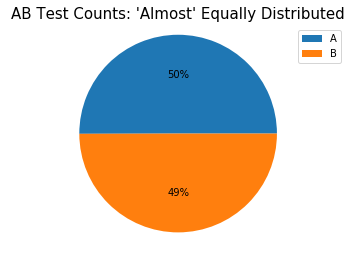

<Figure size 720x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [360]:
plt.pie(ab_counts.gender,autopct='%d%%')
plt.axis('equal')
plt.legend(['A','B'])
plt.title("AB Test Counts: 'Almost' Equally Distributed", fontsize=15)
plt.figure(figsize=(10,8))
plt.show()
plt.savefig('ab_test_pie_chart.png')

## Step 4: Who picks up an application?

Recall that the sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

Let's examine how many people make it to Step 2, filling out an application.

Start by creating a new column in `df` called `is_application` which is `Application` if `application_date` is not `None` and `No Application`, otherwise.

In [180]:
df['null_application']=df.application_date.isnull()
df['is_application']=df.null_application.apply(lambda x:'Application' if x == False else 'No Application')
print df.head(20)

   first_name  last_name  gender                         email visit_date  \
0     Armando    Mccarty    male     Armando.Mccarty@gmail.com     9-9-17   
1      Sidney      Noble    male          SNoble1971@gmail.com     9-9-17   
2      Walter     Lowery    male       WalterLowery8@gmail.com     9-9-17   
3       Kathy     Macias  female         KMacias1975@gmail.com     9-9-17   
4      Glenda    Mullins  female              GM2973@gmail.com     9-9-17   
5     Chester    Whitney    male  ChesterWhitney27@outlook.com     9-9-17   
6        Lori    Wilkins  female      Lori.Wilkins@hotmail.com     9-9-17   
7   Constance       Pope  female              CP6444@gmail.com     9-9-17   
8       Tracy      Ewing  female         Tracy.Ewing@gmail.com     9-9-17   
9      Sylvia     Finley  female      SylviaFinley50@gmail.com     9-9-17   
10     Ramona    Gilmore  female        RGilmore1975@gmail.com     9-9-17   
11   Jennifer  Hendricks  female  Jennifer.Hendricks@gmail.com     9-9-17   

"df['ab_test_group']=df.ab_test_group.apply(lambda x:'B' if pd.isnull(x) else 'A')\nprint df.head()"

Now, using `groupby`, count how many people from Group A and Group B either do or don't pick up an application.  You'll want to group by `ab_test_group` and `is_application`.  Save this new DataFrame as `app_counts`

In [307]:
app_counts=df.groupby(['is_application','ab_test_group']).first_name.count().reset_index()

print app_counts


   is_application ab_test_group  first_name
0     Application             A         250
1     Application             B         325
2  No Application             A        2254
3  No Application             B        2175


We're going to want to calculate the percent of people in each group who complete an application.  It's going to be much easier to do this if we pivot `app_counts` such that:
- The `index` is `ab_test_group`
- The `columns` are `is_application`
Perform this pivot and save it to the variable `app_pivot`.  Remember to call `reset_index()` at the end of the pivot!

In [326]:
app_pivot=app_counts.pivot(columns='is_application',index='ab_test_group',values='first_name').reset_index()

print app_pivot

is_application ab_test_group  Application  No Application
0                          A          250            2254
1                          B          325            2175


Define a new column called `Total`, which is the sum of `Application` and `No Application`.

In [332]:
app_pivot['Total']=app_pivot['Application']+app_pivot['No Application']

print app_pivot

is_application ab_test_group  Application  No Application  Total
0                          A          250            2254   2504
1                          B          325            2175   2500


Calculate another column called `Percent with Application`, which is equal to `Application` divided by `Total`.

In [333]:
app_pivot['Percent with Application']=app_pivot['Application']/app_pivot['Total']

print app_pivot

is_application ab_test_group  Application  No Application  Total  \
0                          A          250            2254   2504   
1                          B          325            2175   2500   

is_application  Percent with Application  
0                                0.09984  
1                                0.13000  


It looks like more people from Group B turned in an application.  Why might that be?

We need to know if this difference is statistically significant.

Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [243]:
from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency([[250, 2254],
     [325, 2175]])
print pval

#pval < .05... There IS a statistically significant difference!

0.0009647827600722304


## Step 4: Who purchases a membership?

Of those who picked up an application, how many purchased a membership?

Let's begin by adding a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [248]:
df['null_purchase']=df.purchase_date.isnull()
df['is_member']=df.null_purchase.apply(lambda x:'Member' if x == False else 'Not Member')
print df.head(20)

   first_name  last_name  gender                         email visit_date  \
0     Armando    Mccarty    male     Armando.Mccarty@gmail.com     9-9-17   
1      Sidney      Noble    male          SNoble1971@gmail.com     9-9-17   
2      Walter     Lowery    male       WalterLowery8@gmail.com     9-9-17   
3       Kathy     Macias  female         KMacias1975@gmail.com     9-9-17   
4      Glenda    Mullins  female              GM2973@gmail.com     9-9-17   
5     Chester    Whitney    male  ChesterWhitney27@outlook.com     9-9-17   
6        Lori    Wilkins  female      Lori.Wilkins@hotmail.com     9-9-17   
7   Constance       Pope  female              CP6444@gmail.com     9-9-17   
8       Tracy      Ewing  female         Tracy.Ewing@gmail.com     9-9-17   
9      Sylvia     Finley  female      SylviaFinley50@gmail.com     9-9-17   
10     Ramona    Gilmore  female        RGilmore1975@gmail.com     9-9-17   
11   Jennifer  Hendricks  female  Jennifer.Hendricks@gmail.com     9-9-17   

"df['ab_test_group']=df.ab_test_group.apply(lambda x:'B' if pd.isnull(x) else 'A')\nprint df.head()"

Now, let's create a DataFrame called `just_apps` the contains only people who picked up an application.

In [254]:
just_apps=df[df.is_application=='Application']

print just_apps.head()

   first_name last_name  gender                       email visit_date  \
15    Raymond  Cantrell    male  Raymond.Cantrell@gmail.com     9-9-17   
23    Roberta   Acevedo  female            RA8063@gmail.com     9-9-17   
42    Suzanne  Humphrey  female  SuzanneHumphrey4@gmail.com     9-9-17   
53      Ruben   Nielsen    male  RubenNielsen93@hotmail.com     9-9-17   
61       Anna   Aguilar  female            AA9306@gmail.com     9-8-17   

   fitness_test_date application_date purchase_date ab_test_group  \
15              None       2017-09-13    2017-09-18             B   
23              None       2017-09-15    2017-09-16             B   
42        2017-09-09       2017-09-13    2017-09-18             A   
53              None       2017-09-13          None             B   
61        2017-09-09       2017-09-10    2017-09-16             A   

   ab_test_group1   null ab_test_group22  null_fitness  null_application  \
15              B   True               B          True          

In [309]:
just_app_counts=just_apps.groupby(['is_member','ab_test_group']).first_name.count().reset_index()

print just_app_counts

member_pivot=just_app_counts.pivot(columns='is_member',index='ab_test_group',values='first_name').reset_index()
member_pivot['Total']=member_pivot['Member']+member_pivot['Not Member']
member_pivot['Percent Purchase']=member_pivot['Member']/member_pivot['Total']

print member_pivot

    is_member ab_test_group  first_name
0      Member             A         200
1      Member             B         250
2  Not Member             A          50
3  Not Member             B          75
is_member ab_test_group  Member  Not Member  Total  Percent Purchase
0                     A     200          50    250          0.800000
1                     B     250          75    325          0.769231


It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application.  Why might that be?

Just like before, we need to know if this difference is statistically significant.  Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [262]:
from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency([[200, 50],
     [250, 75]])
print pval

#pval > .05... There IS NOT a statistically significant difference!

0.43258646051083327


Previously, we looked at what percent of people **who picked up applications** purchased memberships.  What we really care about is what percentage of **all visitors** purchased memberships.  Return to `df` and do a `groupby` to find out how many people in `df` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `final_member_pivot`.

In [263]:
all_purchase_counts=df.groupby(['is_member','ab_test_group']).first_name.count().reset_index()

print all_purchase_counts

final_member_pivot=all_purchase_counts.pivot(columns='is_member',index='ab_test_group',values='first_name').reset_index()
final_member_pivot['Total']=all_purchase_pivot['Member']+all_purchase_pivot['Not Member']
final_member_pivot['Percent Purchase']=all_purchase_pivot['Member']/all_purchase_pivot['Total']

print final_member_pivot

    is_member ab_test_group  first_name
0      Member             A         200
1      Member             B         250
2  Not Member             A        2304
3  Not Member             B        2250
is_member ab_test_group  Member  Not Member  Total  Percent Purchase
0                     A     200        2304   2504          0.079872
1                     B     250        2250   2500          0.100000


Previously, when we only considered people who had **already picked up an application**, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B.  Perform a significance test and check.

In [261]:
from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency([[200, 2304],
     [250, 2250]])
print pval

#pval < .05... There IS a statistically significant difference!

0.014724114645783203


## Step 5: Summarize the acquisition funel with a chart

We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

Create one plot for **each** of the three sets of percentages that you calculated in `app_pivot`, `member_pivot` and `final_member_pivot`.  Each plot should:
- Label the two bars as `Fitness Test` and `No Fitness Test`
- Make sure that the y-axis ticks are expressed as percents (i.e., `5%`)
- Have a title

In [330]:
print app_pivot

is_application ab_test_group  Application  No Application
0                          A          250            2254
1                          B          325            2175


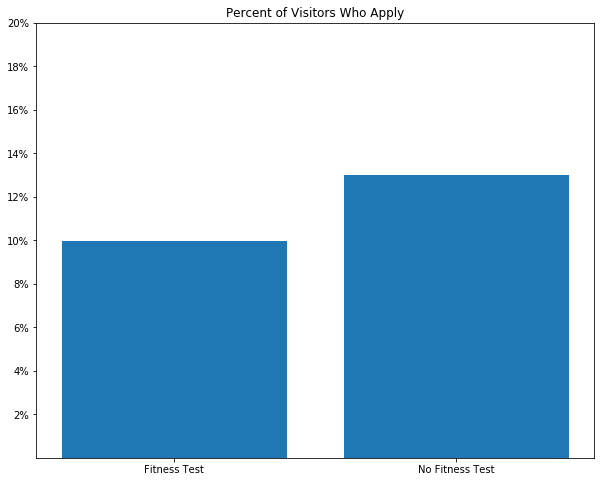

In [334]:
plt.figure(figsize=(10,8))
plt.title("Percent of Visitors Who Apply")
plt.bar((range(len(app_pivot['Percent with Application']))),app_pivot['Percent with Application'])
ax=plt.subplot()
ax.set_xticks(range(len(app_pivot['Percent with Application'])))
ax.set_xticklabels(["Fitness Test", "No Fitness Test"])
ax.set_yticks([0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20])
ax.set_yticklabels(['2%', '4%', '6%', '8%', '10%', '12%', '14%', '16%', '18%', '20%'])

plt.show()

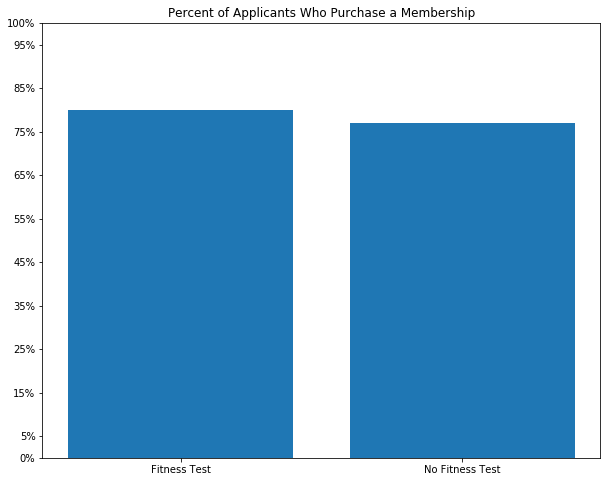

In [328]:
plt.figure(figsize=(10,8))
plt.title("Percent of Applicants Who Purchase a Membership")
plt.bar((range(len(member_pivot['Percent Purchase']))),member_pivot['Percent Purchase'])
ax=plt.subplot()
ax.set_xticks(range(len(member_pivot['Percent Purchase'])))
ax.set_xticklabels(["Fitness Test", "No Fitness Test"])
ax.set_yticks([.0, .05, .15, .25, .35, .45, .55, .65, .75, .85, .95, 1])
ax.set_yticklabels(['0%', '5%', '15%', '25%', '35%', '45%', '55%', '65%', '75%', '85%', '95%', '100%'])

plt.show()

In [300]:
print final_member_pivot

is_member ab_test_group  Member  Not Member  Total  Percent Purchase
0                     A     200        2304   2504          0.079872
1                     B     250        2250   2500          0.100000


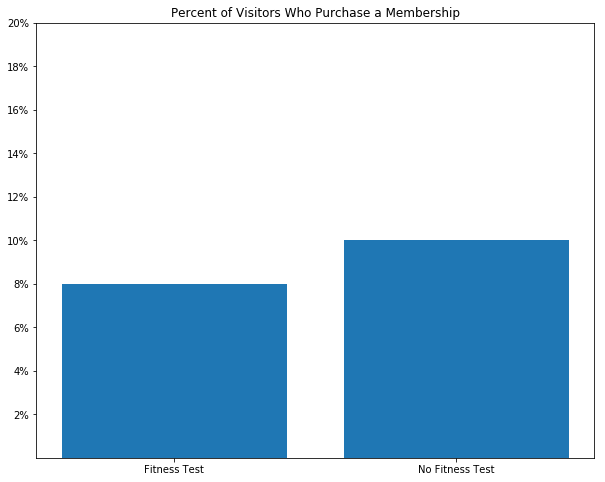

In [324]:
plt.figure(figsize=(10,8))
plt.title("Percent of Visitors Who Purchase a Membership")
plt.bar((range(len(final_member_pivot['Percent Purchase']))),final_member_pivot['Percent Purchase'])
ax=plt.subplot()
ax.set_xticks(range(len(final_member_pivot['Percent Purchase'])))
ax.set_xticklabels(["Fitness Test", "No Fitness Test"])
ax.set_yticks([0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20])
ax.set_yticklabels(['2%', '4%', '6%', '8%', '10%', '12%', '14%', '16%', '18%', '20%'])

plt.show()